In [66]:
# Importando Bibliotecas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams.update({'font.size':24})
plt.rcParams['legend.fontsize'] = 14
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
# Carregando a base de dados:
df = pd.read_csv('ph_c.CSV',encoding='utf-8',sep=';')

In [196]:
# Verificando os dados:
df.head()

,periodode,periodoate,cod_interaguas,tipo_rede,UGRHI,codigo_ponto,status_ponto,data_coleta,hora_coleta,parametro,...,classe,municipio,uf,inicio_operacao,fim_operacao,Latitude,Longitude,Altitude,Localizacao,Captacao
0,01/01/1974,28/12/2019,166,Rede Básica,10 - SOROCABA/MEDIO TIETE,TIBT02500,Ativo,08/02/1995,14:15,pH,...,Classe 2,BOTUCATU,SP,01/01/1995,NaN,22 40 41,48 15 06,460,Ponte na rodovia SP-191 que liga Santa Maria d...,N
1,01/01/1974,28/12/2019,166,Rede Básica,10 - SOROCABA/MEDIO TIETE,TIBT02500,Ativo,03/04/1995,14:50,pH,...,Classe 2,BOTUCATU,SP,01/01/1995,NaN,22 40 41,48 15 06,460,Ponte na rodovia SP-191 que liga Santa Maria d...,N
2,01/01/1974,28/12/2019,166,Rede Básica,10 - SOROCABA/MEDIO TIETE,TIBT02500,Ativo,24/05/1995,15:30,pH,...,Classe 2,BOTUCATU,SP,01/01/1995,NaN,22 40 41,48 15 06,460,Ponte na rodovia SP-191 que liga Santa Maria d...,N
3,01/01/1974,28/12/2019,166,Rede Básica,10 - SOROCABA/MEDIO TIETE,TIBT02500,Ativo,26/06/1995,14:00,pH,...,Classe 2,BOTUCATU,SP,01/01/1995,NaN,22 40 41,48 15 06,460,Ponte na rodovia SP-191 que liga Santa Maria d...,N
4,01/01/1974,28/12/2019,166,Rede Básica,10 - SOROCABA/MEDIO TIETE,TIBT02500,Ativo,12/07/1995,15:15,pH,...,Classe 2,BOTUCATU,SP,01/01/1995,NaN,22 40 41,48 15 06,460,Ponte na rodovia SP-191 que liga Santa Maria d...,N


In [57]:
# Número de linhas e colunas:
df.shape

(4178, 26)

In [58]:
# Estatística Descritiva:
df.describe()

,cod_interaguas,sinal,valor,Altitude
count,4178.000000,0.0,4178.000000,4178.000000
mean,322.776448,NaN,6.949526,629.541886
std,506.562455,NaN,0.463450,131.871299
min,60.000000,NaN,3.500000,5.000000
25%,124.000000,NaN,6.700000,528.000000
50%,132.000000,NaN,7.000000,699.000000
75%,331.000000,NaN,7.200000,716.000000
max,3307.000000,NaN,9.100000,784.000000


In [59]:
# Tipos de Dados:
df.dtypes

periodode                object
periodoate               object
cod_interaguas            int64
tipo_rede                object
UGRHI                    object
codigo_ponto             object
status_ponto             object
data_coleta              object
hora_coleta              object
parametro                object
sinal                   float64
valor                   float64
unidade                  object
tipo_parametro           object
sistema_hidrico          object
tipo_sistema_hidrico     object
classe                   object
municipio                object
uf                       object
inicio_operacao          object
fim_operacao             object
Latitude                 object
Longitude                object
Altitude                  int64
Localizacao              object
Captacao                 object
dtype: object

In [60]:
# Verificando registros nulos:
df.isnull().sum()

periodode                  0
periodoate                 0
cod_interaguas             0
tipo_rede                  0
UGRHI                      0
codigo_ponto               0
status_ponto               0
data_coleta                0
hora_coleta                0
parametro                  0
sinal                   4178
valor                      0
unidade                    0
tipo_parametro             0
sistema_hidrico            0
tipo_sistema_hidrico       0
classe                     0
municipio                  0
uf                         0
inicio_operacao            0
fim_operacao            3805
Latitude                   0
Longitude                  0
Altitude                   0
Localizacao                0
Captacao                   0
dtype: int64

In [52]:
# Definindo um estilo para os gráficos:
plt.style.use('fivethirtyeight')

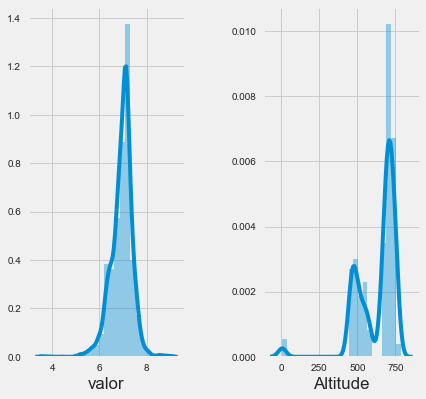

In [12]:
# Verificando as distribuição dos dados:
plt.figure(1 , figsize = (10 , 6))
n = 0 
for x in ['valor' , 'Altitude']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 25)
    # plt.title('{} '.format(x))
plt.show()

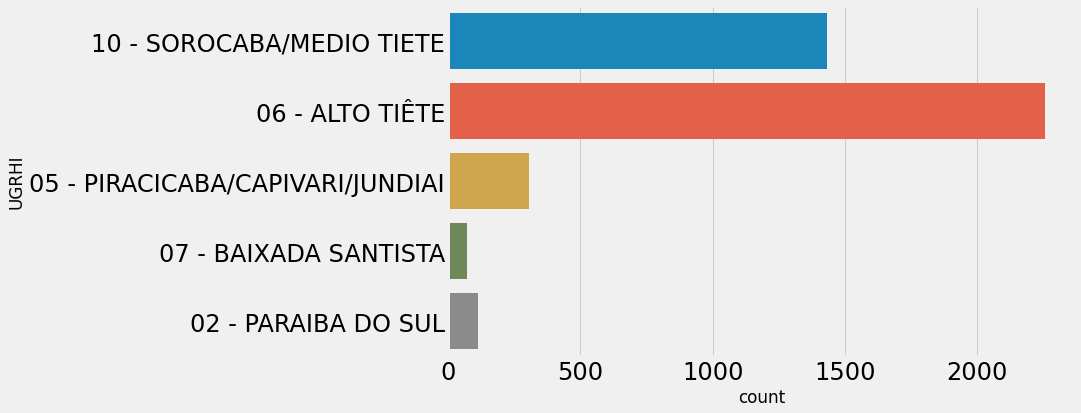

In [10]:
# Contagem de Amostras por UGRHI:
plt.figure(1 , figsize = (10 , 6))
sns.countplot(y = 'UGRHI' , data = df)
plt.show()

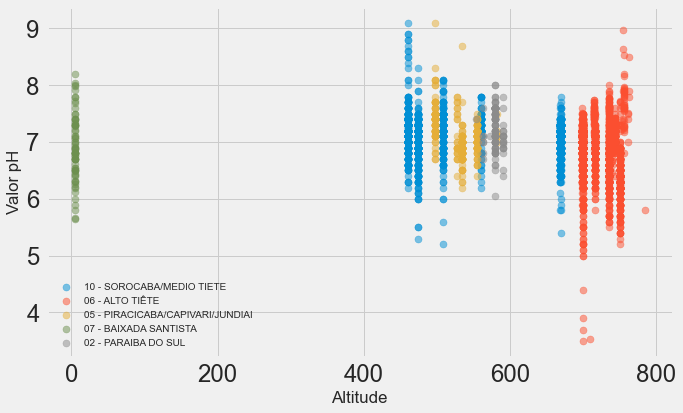

In [63]:
# Renda Anual vs Pontuação de Gastos:
plt.figure(1 , figsize = (10 , 6))
for ugrhi in ['10 - SOROCABA/MEDIO TIETE' , '06 - ALTO TIÊTE','05 - PIRACICABA/CAPIVARI/JUNDIAI','07 - BAIXADA SANTISTA','02 - PARAIBA DO SUL']:
    plt.scatter(x = 'Altitude',y = 'valor' , data = df[df['UGRHI'] == ugrhi] ,s = 50 , alpha = 0.5 , label = ugrhi)
plt.xlabel('Altitude'), plt.ylabel('Valor pH') 
#plt.title('Altitude vs Valor pH')
plt.legend()
plt.show()

In [67]:
from sklearn.preprocessing import MinMaxScaler
X2 = df[['valor' , 'Altitude']].iloc[: , :].values
sc = MinMaxScaler()
X2 = sc.fit_transform(X2)
X2

array([[0.60714286, 0.58408216],
       [0.57142857, 0.58408216],
       [0.55357143, 0.58408216],
       ...,
       [0.72857143, 0.9114249 ],
       [0.65535714, 0.9114249 ],
       [0.69464286, 0.9114249 ]])

In [68]:
# Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters):
#X2 = df[['valor' , 'Altitude']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

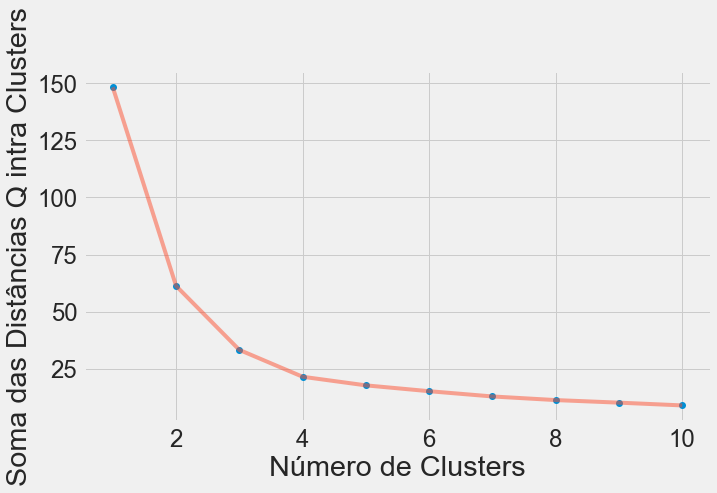

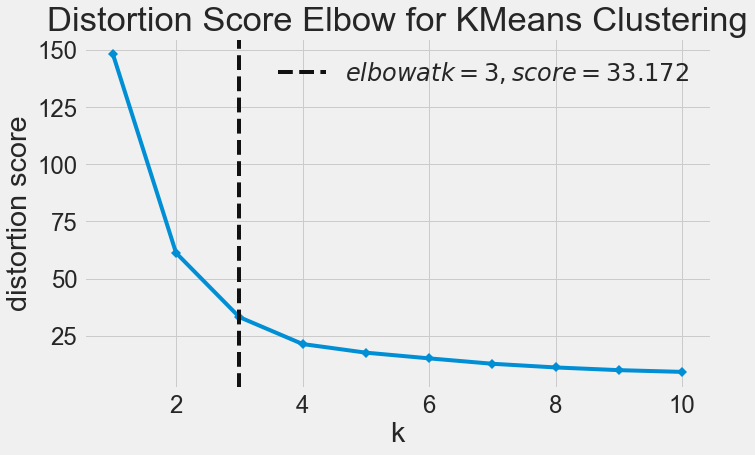

In [69]:
plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11),timings=False,locate_elbow=True)

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [70]:
# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

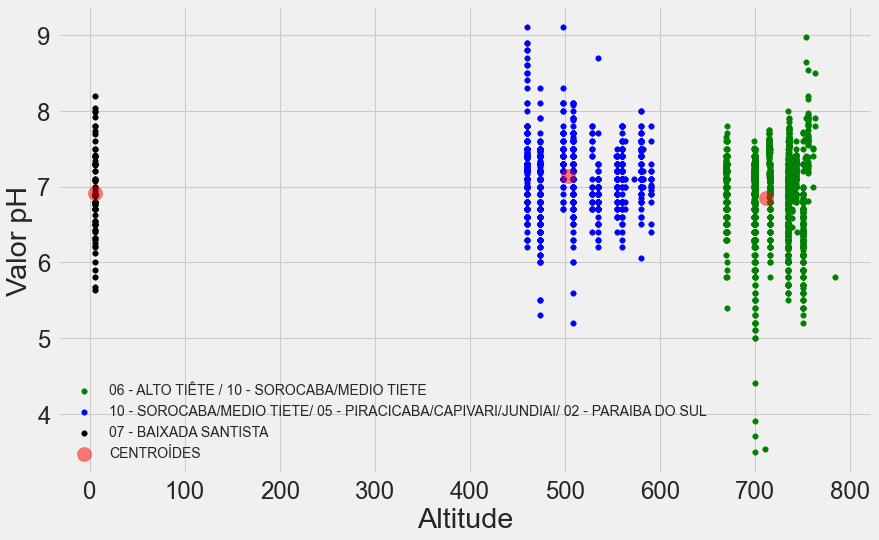

array([[  6.85469959, 711.11168448],
       [  7.13615219, 502.95764537],
       [  6.91194444,   5.        ]])

In [71]:
# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

X2 = sc.inverse_transform(X2)
centroids2 = sc.inverse_transform(centroids2)
'''
h = 0.02
x_min, x_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
y_min, y_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max), np.linspace(y_min, y_max))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
'''
plt.figure(1 , figsize = (13 , 8) )
#plt.clf()
#Z2 = Z.reshape(xx.shape)
#plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
#plt.scatter( x = 'Altitude' ,y = 'valor' , data = df , c = labels2 , s = 100 )
plt.scatter( X2[labels2 == 0, 1], X2[labels2 == 0, 0], c = 'green' , label = '06 - ALTO TIÊTE / 10 - SOROCABA/MEDIO TIETE',s = 30 )
plt.scatter( X2[labels2 == 1, 1], X2[labels2 == 1, 0], c = 'blue' , label = '10 - SOROCABA/MEDIO TIETE/ 05 - PIRACICABA/CAPIVARI/JUNDIAI/ 02 - PARAIBA DO SUL',s = 30 )
plt.scatter( X2[labels2 == 2, 1], X2[labels2 == 2, 0], c = 'black' , label = '07 - BAIXADA SANTISTA',s = 30 )
plt.scatter(x = centroids2[: , 1] , y =  centroids2[: , 0] , s = 200 , c = 'red' , alpha = 0.5,label = 'CENTROÍDES')
plt.ylabel('Valor pH') , plt.xlabel('Altitude')
plt.legend(loc='lower left')
plt.show()

centroids2



In [ ]:
df["clusters"] = algorithm.labels_
df = df.drop(["periodode","periodoate","cod_interaguas","tipo_rede","codigo_ponto","status_ponto",
                    "data_coleta","hora_coleta","parametro","sinal","unidade","tipo_parametro",
                   "sistema_hidrico","tipo_sistema_hidrico","classe","municipio","uf","inicio_operacao","fim_operacao",
                   "Latitude","Longitude","Localizacao","Captacao"],axis=1)


In [217]:

df.head()

,periodode,periodoate,cod_interaguas,tipo_rede,UGRHI,codigo_ponto,status_ponto,data_coleta,hora_coleta,parametro,...,classe,municipio,uf,inicio_operacao,fim_operacao,Latitude,Longitude,Altitude,Localizacao,Captacao
0,01/01/1974,28/12/2019,166,Rede Básica,10 - SOROCABA/MEDIO TIETE,TIBT02500,Ativo,08/02/1995,14:15,pH,...,Classe 2,BOTUCATU,SP,01/01/1995,NaN,22 40 41,48 15 06,460,Ponte na rodovia SP-191 que liga Santa Maria d...,N
1,01/01/1974,28/12/2019,166,Rede Básica,10 - SOROCABA/MEDIO TIETE,TIBT02500,Ativo,03/04/1995,14:50,pH,...,Classe 2,BOTUCATU,SP,01/01/1995,NaN,22 40 41,48 15 06,460,Ponte na rodovia SP-191 que liga Santa Maria d...,N
2,01/01/1974,28/12/2019,166,Rede Básica,10 - SOROCABA/MEDIO TIETE,TIBT02500,Ativo,24/05/1995,15:30,pH,...,Classe 2,BOTUCATU,SP,01/01/1995,NaN,22 40 41,48 15 06,460,Ponte na rodovia SP-191 que liga Santa Maria d...,N
3,01/01/1974,28/12/2019,166,Rede Básica,10 - SOROCABA/MEDIO TIETE,TIBT02500,Ativo,26/06/1995,14:00,pH,...,Classe 2,BOTUCATU,SP,01/01/1995,NaN,22 40 41,48 15 06,460,Ponte na rodovia SP-191 que liga Santa Maria d...,N
4,01/01/1974,28/12/2019,166,Rede Básica,10 - SOROCABA/MEDIO TIETE,TIBT02500,Ativo,12/07/1995,15:15,pH,...,Classe 2,BOTUCATU,SP,01/01/1995,NaN,22 40 41,48 15 06,460,Ponte na rodovia SP-191 que liga Santa Maria d...,N


In [218]:
df = df.drop(["periodode","periodoate","cod_interaguas","tipo_rede","UGRHI","codigo_ponto","status_ponto",
                    "data_coleta","hora_coleta","parametro","sinal","unidade","tipo_parametro",
                   "sistema_hidrico","tipo_sistema_hidrico","classe","municipio","uf","inicio_operacao","fim_operacao",
                   "Latitude","Longitude","Localizacao","Captacao"],axis=1)

df["clusters"] = algorithm.labels_



In [219]:
df_group.groupby("clusters")

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [233]:
df[df['UGRHI'] == '10 - SOROCABA/MEDIO TIETE']

,UGRHI,valor,Altitude,clusters
0,10 - SOROCABA/MEDIO TIETE,6.90,460,1
1,10 - SOROCABA/MEDIO TIETE,6.70,460,1
2,10 - SOROCABA/MEDIO TIETE,6.60,460,1
3,10 - SOROCABA/MEDIO TIETE,6.60,460,1
4,10 - SOROCABA/MEDIO TIETE,6.60,460,1
...,...,...,...,...
3639,10 - SOROCABA/MEDIO TIETE,7.29,669,0
3640,10 - SOROCABA/MEDIO TIETE,7.65,669,0
3641,10 - SOROCABA/MEDIO TIETE,7.18,669,0
3642,10 - SOROCABA/MEDIO TIETE,7.00,669,0


In [237]:
print("Grupo","UGRHI                           ","Amostragem")
print("0    ","06 - ALTO TIÊTE                 ","2257")
print("0    ","10 - SOROCABA/MEDIO TIETE       ","456")
print("1    ","02 - PARAIBA DO SUL             ","112")
print("1    ","05 - PIRACICABA/CAPIVARI/JUNDIAI","306")
print("1    ","10 - SOROCABA/MEDIO TIETE       ","975")
print("2    ","07 - BAIXADA SANTISTA           ","72")
print("Total Amostragem:                       ","4178")


Grupo UGRHI                            Amostragem
0     06 - ALTO TIÊTE                  2257
0     10 - SOROCABA/MEDIO TIETE        456
1     02 - PARAIBA DO SUL              112
1     05 - PIRACICABA/CAPIVARI/JUNDIAI 306
1     10 - SOROCABA/MEDIO TIETE        975
2     07 - BAIXADA SANTISTA            72
Total Amostragem:                        4178


In [235]:
df.groupby(['UGRHI','clusters']).agg({'clusters': np.size})

clusters
UGRHI                            clusters          
02 - PARAIBA DO SUL              1              112
05 - PIRACICABA/CAPIVARI/JUNDIAI 1              306
06 - ALTO TIÊTE                  0             2257
07 - BAIXADA SANTISTA            2               72
10 - SOROCABA/MEDIO TIETE        0              456
                                 1              975

In [85]:
# Excluindo as colunas que não foram utilizadas:
df_group = df.groupby("clusters")

In [104]:
df[df['clusters'] == 2]

In [86]:
# Estatística descritiva dos grupos:
df_group.describe()

valor                                                       \
           count      mean       std   min     25%    50%   75%   max   
clusters                                                                
0         2713.0  6.854700  0.462772  3.50  6.6000  6.940  7.14  8.98   
1         1393.0  7.136152  0.396949  5.20  6.9000  7.100  7.40  9.10   
2           72.0  6.911944  0.581585  5.64  6.5075  6.835  7.30  8.20   

         Altitude                                                            
            count        mean        std    min    25%    50%    75%    max  
clusters                                                                     
0          2713.0  711.111684  26.246415  669.0  699.0  700.0  735.0  784.0  
1          1393.0  502.957645  40.772414  460.0  460.0  498.0  535.0  590.0  
2            72.0    5.000000   0.000000    5.0    5.0    5.0    5.0    5.0